# 1. Keşifsel Veri Analizi (EDA) Yapılması

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
veri_komb = pd.read_csv('veri_komb.csv', encoding='iso-8859-9', sep=",")
veri_komb.set_index('hastalik').head()

,baş ağrısı,bulanık görme,burun kanaması,düzensiz kalp ritmi,göğüs ağrısı,göğüste baskı,idrarda kan,nefes darlığı,ciltte kırmızlık,göz kapağında şişme,...,ruh hali değişimleri,çarpıntı,kanlı balgam,sürekli öksürük,ağız içinde yumru,ağızda uyuşma,boyunda yumru,gevşek diş,iyileşmeyen ağız yarası,koyu cilt
hastalik,,,,,,,,,,,,,,,,,,,,,
addison,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addison,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addison,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
addison,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
addison,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 1.1 Genel bilgiler

Veri seti 7000 kayıt ve 211 semptomdan oluşmaktadır.

In [3]:
veri_komb.shape

(7000, 212)

Veri seti içerisinde NaN değer bulunmamaktadır.

In [4]:
veri_komb.isna().any()

baş ağrısı                 False
bulanık görme              False
burun kanaması             False
düzensiz kalp ritmi        False
göğüs ağrısı               False
                           ...  
boyunda yumru              False
gevşek diş                 False
iyileşmeyen ağız yarası    False
koyu cilt                  False
hastalik                   False
Length: 212, dtype: bool

Veri setimiz int (1: semptom var, 0: semptom yok) türünde verilerden oluşmaktadır. Index olan hastalık ismi ise object olarak tutulmaktadır.

In [5]:
veri_komb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Columns: 212 entries, baş ağrısı to hastalik
dtypes: int64(211), object(1)
memory usage: 11.3+ MB


## 1.2 Semptomların görülme sıklıklarının karşılaştırılması

En az görülen semptomlara bakıldığında kemik kırılması, deride su toplanması veya ağrısız yara gibi daha spesifik semptomlar olduğu gözlemlenmektedir. En çok görülen semptomlar ise ateş, bulantı, baş ağrısı gibi daha genel olup herhangi bir hastalıkla direkt bağdaştırılamamaktadırlar. Bu da verimizde tutarlılık olduğunu göstermektedir.

In [6]:
semptom_veri = veri_komb.sum(numeric_only=True, axis=0).sort_values()

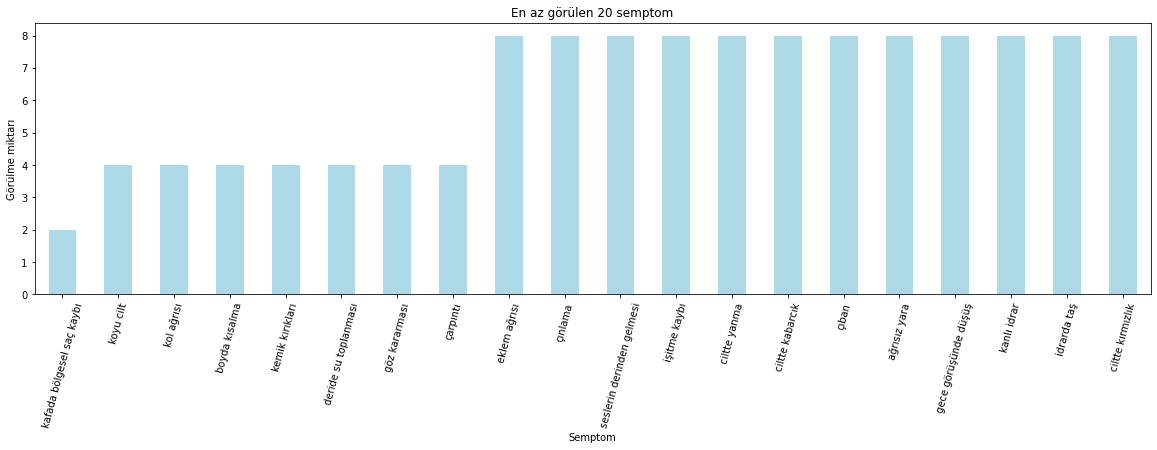

In [7]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
semptom_veri.head(20).plot.bar(color='lightblue', rot=75)
 
plt.xlabel("Semptom")
plt.ylabel("Görülme miktarı")
plt.title("En az görülen 20 semptom")
plt.show()

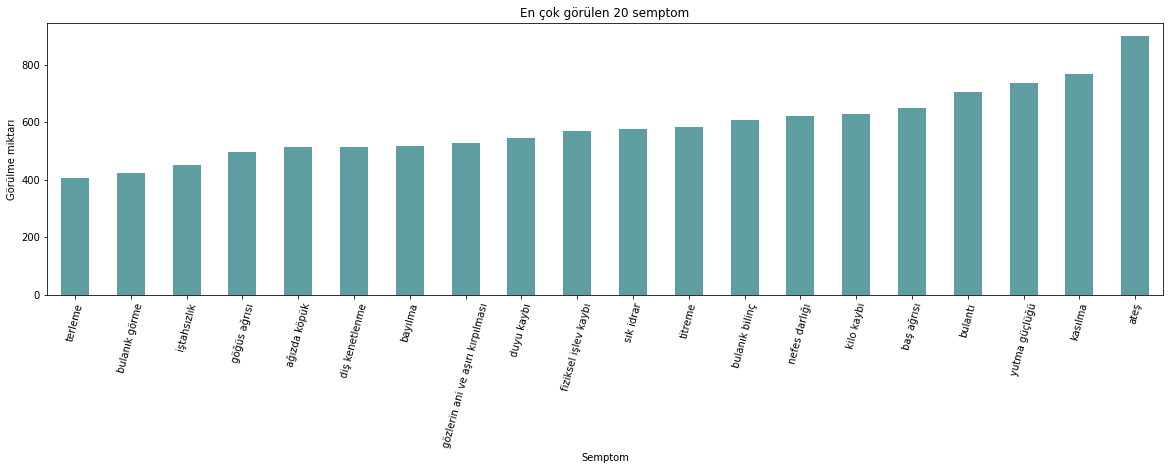

In [8]:
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
semptom_veri.tail(20).plot.bar(color='cadetblue', rot=75)
 
plt.xlabel("Semptom")
plt.ylabel("Görülme miktarı")
plt.title("En çok görülen 20 semptom")
plt.show()

## 1.3 Hastalıklar için veri miktarlarının karşılaştırılması

Veri miktarı içinde bir miktar dengesizlik bulunmaktadır. Maksimum ve minimum sınıflar dışında veri dengeli bir dağılım izlemektedir. Bir sonraki adım olan makine öğrenmesinde tahmin adımında yeterli başarı sağlanamazsa veri eklemek başarıyı yükseltmek için bir çözüm olabilir. Veri eklemek dışında epilepsi, diyabet ve tetanoz gibi diğer hastalıklardan fazla veri içeren grupların kombinasyon miktarlarında değişikliğe gidilebilir. Örneğin kombinasyon grubu 6'dan başlatıldığı taktirde epilepsi için veri sayısı 386'ya düşmektedir.

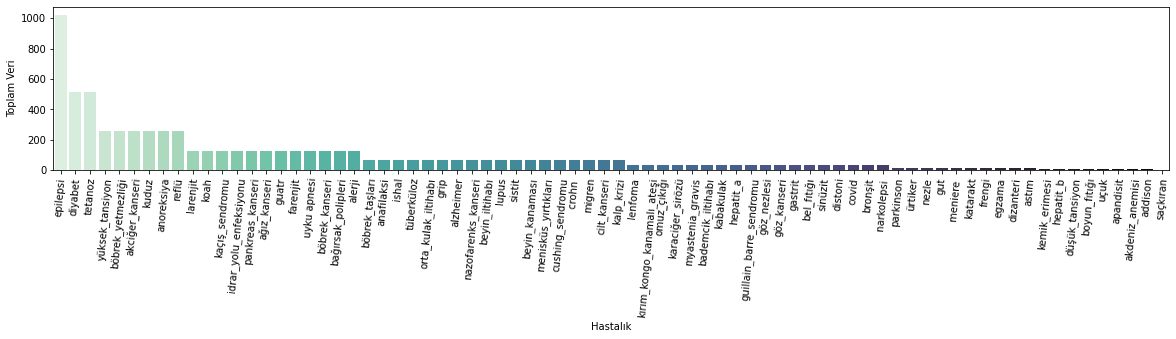

In [9]:
disease_counts = veri_komb["hastalik"].value_counts()
temp_df = pd.DataFrame({"Hastalık": disease_counts.index, "Toplam Veri": disease_counts.values})

plt.figure(figsize=(20, 3))
sns.set_palette("pastel")
sns.barplot(x="Hastalık", y="Toplam Veri", data=temp_df, palette="mako_r")
plt.xticks(rotation=85)
plt.show()